# COMPARISION OF DROSOPHILA 
#[syncytial blastoderm with embryogenesis (ventral and dorsal)]


In [2]:
#Loading all the necessary libraries 
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, restoration
import numpy as np
from skimage.io import imread
from skimage.filters import threshold_local
from skimage.morphology import opening, dilation, diamond
from tiffwrite import tiffwrite
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import remove_small_objects, label
from skimage.measure import regionprops
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import skimage
import skimage.color
%matplotlib inline

*syncytial blastoderm analysis*

In [3]:
#loading the image details of early stage of drosophila

from skimage.io import imread  # pip install scikit-image
img= imread("C:/Users/dell/Downloads/Screenshot (24).tiff")

type(img)

numpy.ndarray

Text(0.5, 1.0, 'Original image')

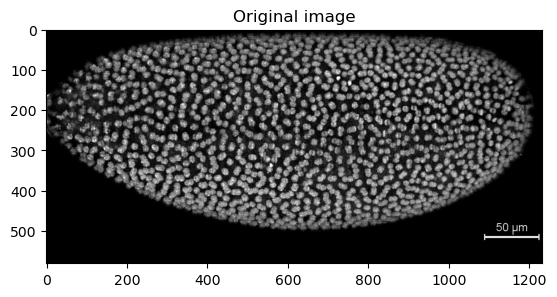

In [4]:
plt.imshow(img)
plt.title('Original image')

In [ ]:
plt.imshow(dorsal)
plt.title('dorsal image')

In [9]:
from skimage import exposure
from functools import partial

#analyzing the histogram for early stage drosophila
def plot_img_and_hist(image, axes=None, bins=64, title=None):
    """Plot an image along with its histogram and cumulative histogram.

    """
    if axes is None:
        fig, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1.5, 1]})
        fig.set_size_inches((8, 4))
        # fig.tight_layout()
    ax_img, ax_hist = axes
    # ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    
    if title is not None:
        ax_img.set_title(title)

    # Display histograms per channel
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    
    plot_hist = partial(ax_hist.hist, bins=bins, histtype='bar', linewidth=2, alpha=0.3, density=True)
    plot_hist(red.ravel(), color='red')
    plot_hist(green.ravel(), color='green')
    plot_hist(blue.ravel(), color='blue')

    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_ylim([0, 3])
    ax_hist.set_yticks([])
    
    ax_hist.set_title('Histogram')

    # Display cumulative distribution
    # img_cdf, bins = exposure.cumulative_distribution(image, bins)
    # ax_cdf.plot(bins, img_cdf, 'r')
    # ax_cdf.set_yticks([])

    return ax_img, ax_hist # , ax_cdf


(<AxesSubplot:title={'center':'Original image'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

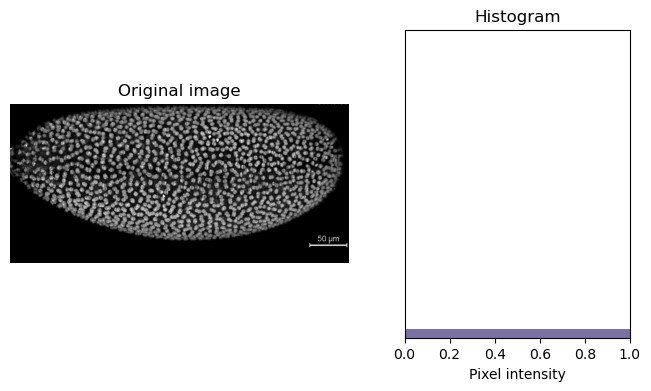

In [10]:
plot_img_and_hist(img, title='Original image')

(<AxesSubplot:title={'center':'Adaptive histogram equalization'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

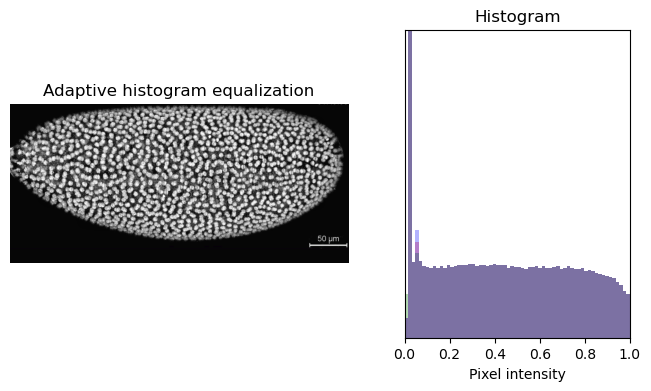

In [11]:
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
plot_img_and_hist(img_adapteq, title='Adaptive histogram equalization')  #adaptive histogram eqaulization for early stage drosophila

(<AxesSubplot:title={'center':'Gamma adjustment, $\\gamma=2.0$'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

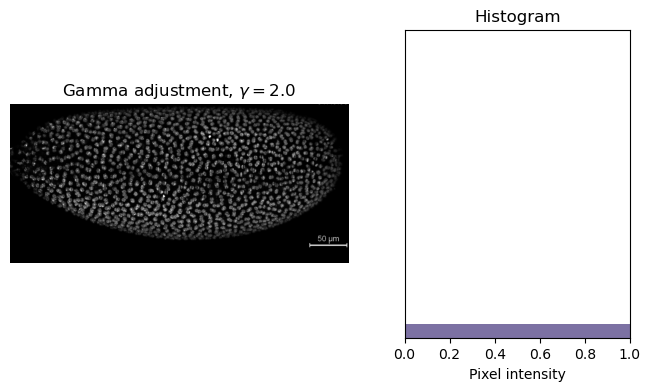

In [12]:
gamma_corrected_2 = exposure.adjust_gamma(img, 2.0) #gamma correction for early stage drosophila
plot_img_and_hist(gamma_corrected_2, title='Gamma adjustment, $\gamma=2.0$')

In [13]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage  # pip install scikit-image

warnings.filterwarnings("ignore")

In [14]:
#Now conversion of rgb scale and gray scale is done to analyze the early stage drosophila


def show(image: np.ndarray, title="Image", cmap_type="gray", axis=False):
    """
    A function to display np.ndarrays as images
    """
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show();

In [15]:
def compare(
    original,
    filtered,
    title_filtered="Filtered",
    cmap_type="gray",
    axis=False,
    title_original="Original",
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

    ax1.imshow(original, cmap=cmap_type)
    ax1.set_title(title_original)

    ax2.imshow(filtered, cmap=cmap_type)
    ax2.set_title(title_filtered)

    if not axis:
        ax1.axis("off")
        ax2.axis("off")
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.01)
    plt.margins(0, 0)
    plt.show();

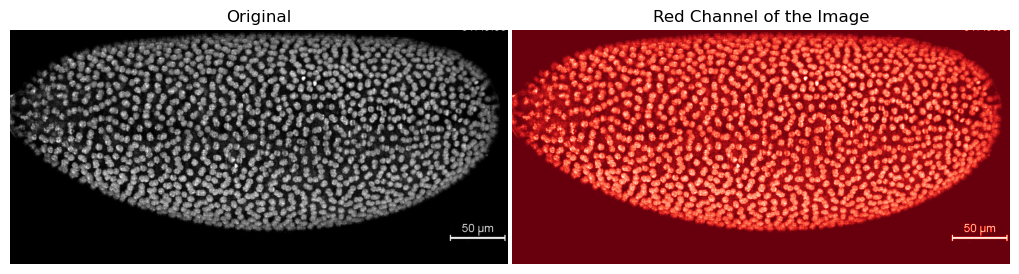

In [16]:
red = img[:, :, 0]

compare(img, red, "Red Channel of the Image", cmap_type="Reds_r")

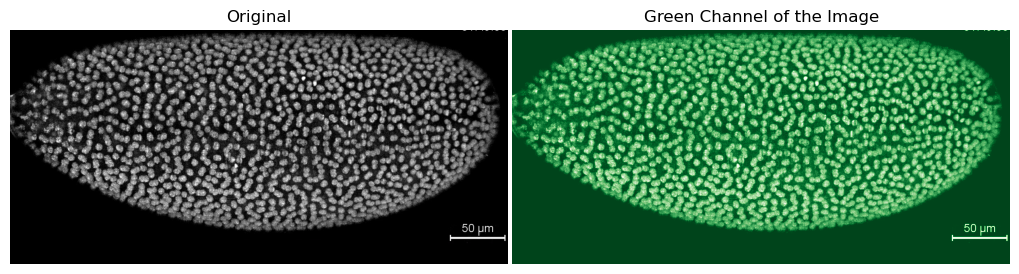

In [17]:
green = img[:, :, 1]

compare(img, green, "Green Channel of the Image", "Greens_r")

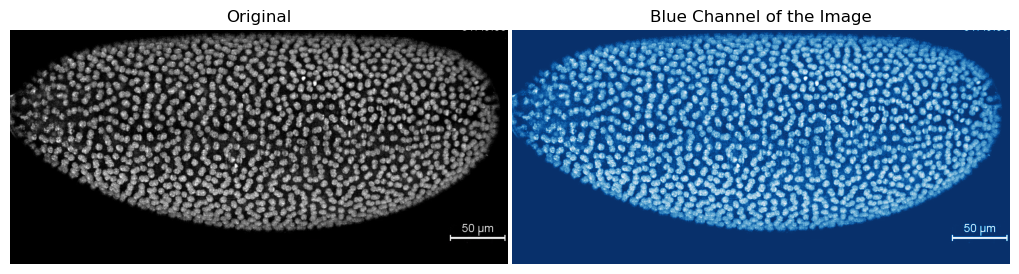

In [18]:
blue = img[:, :, 2]

compare(img, blue, "Blue Channel of the Image", "Blues_r")

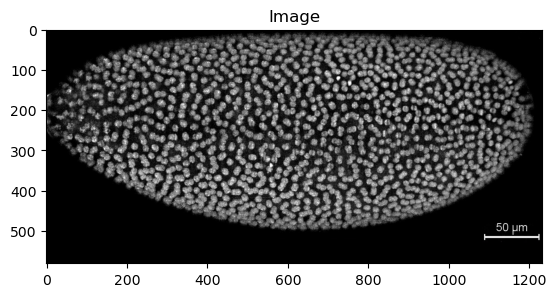

In [19]:
show(img, axis=True)

In [20]:
#Now analyzing the intensities through histogram for early stage drosophila

def plot_with_hist_channel(image, channel):
    channels = ["red", "green", "blue"]
    channel_idx = channels.index(channel)
    color = channels[channel_idx]

    extracted_channel = image[:, :, channel_idx]
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(18, 6)
    )  # , sharex=True, sharey=True)

    ax1.imshow(image)
    ax1.axis("off")
    ax2.hist(extracted_channel.ravel(), bins=256, color=color)
    ax2.set_title(f"{channels[channel_idx]} histogram")

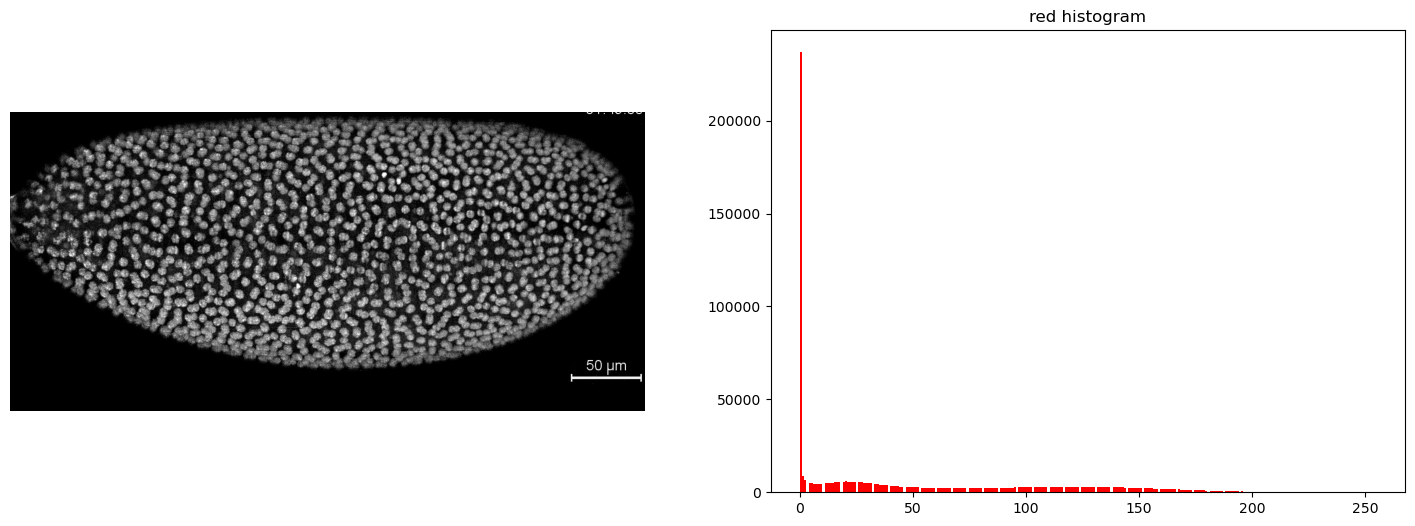

In [21]:
colorful_droso = imread("C:/Users/dell/Downloads/Screenshot (24).tiff")

plot_with_hist_channel(colorful_droso, "red")

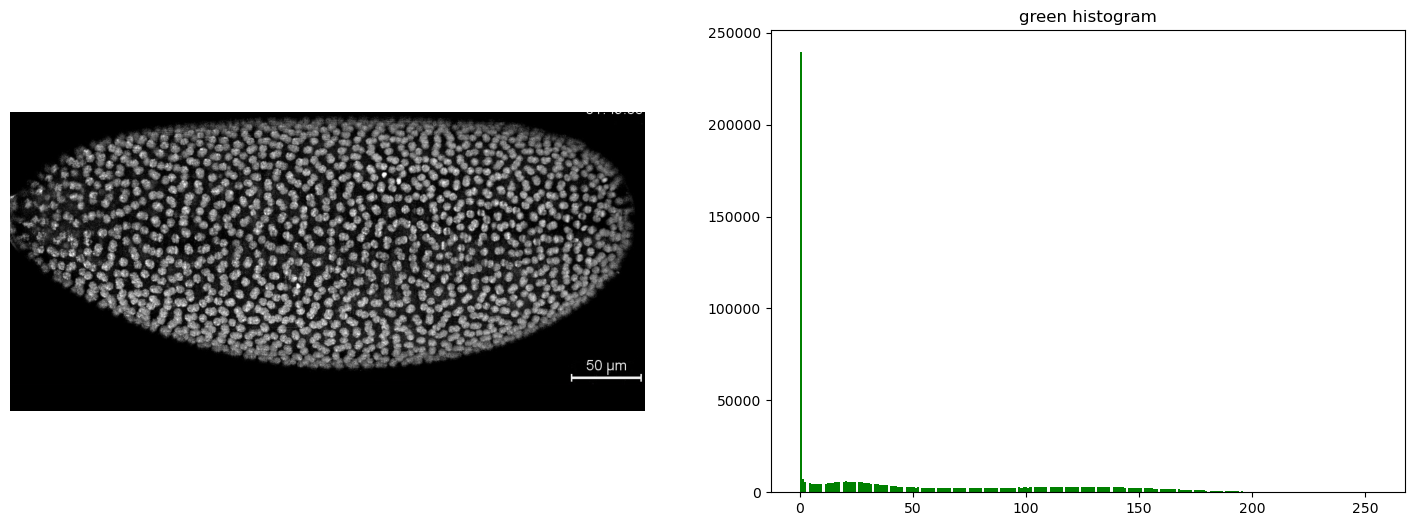

In [22]:
plot_with_hist_channel(colorful_droso, "green")

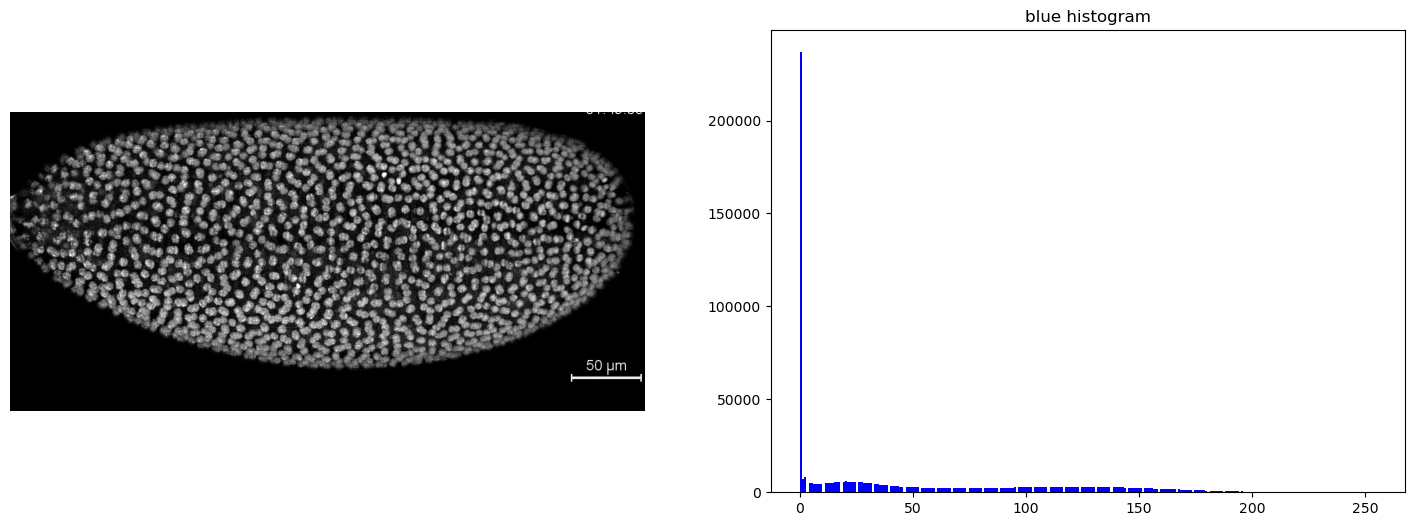

In [23]:
plot_with_hist_channel(colorful_droso, "blue")

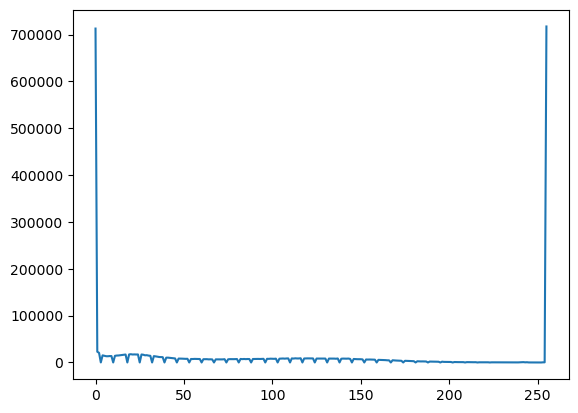

In [24]:
from skimage import io, exposure
import matplotlib.pyplot as plt

# Load the image
img = io.imread('C:/Users/dell/Downloads/Screenshot (24).tiff')

# Calculate the histogram of pixel intensities for  early stage drosophila
hist, bins = exposure.histogram(img)

# Plot the histogram
plt.plot(bins, hist)
plt.show()

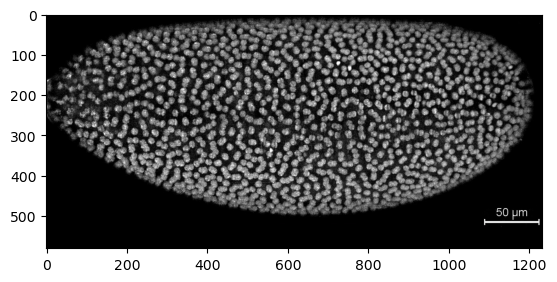

In [25]:
from skimage import io, feature
import matplotlib.pyplot as plt

# Load the image
img = io.imread('C:/Users/dell/Downloads/Screenshot (24).tiff')

# Find local maxima in the image
coords = feature.peak_local_max(img, min_distance=5)

# Create scatter plot of local maxima
plt.scatter(coords[:, 1], coords[:, 0], marker='o', s=10, edgecolors='r')
plt.imshow(img, cmap='gray')
plt.show()

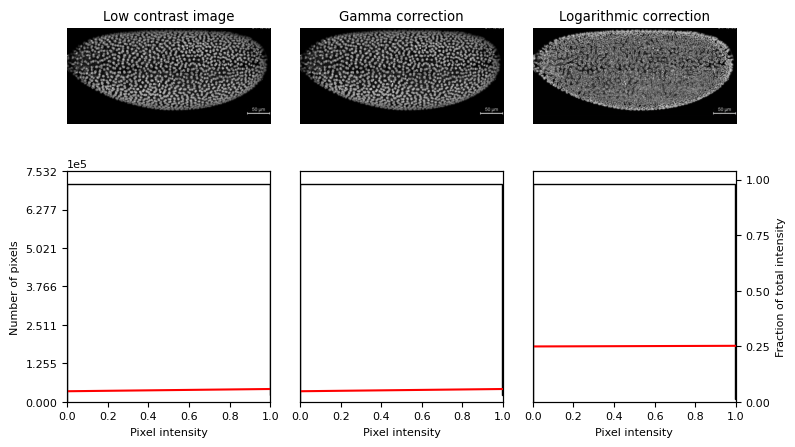

In [26]:
#comparision forearly stage drosophila in low contrast,gamma and logarithmic correction 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = io.imread('C:/Users/dell/Downloads/Screenshot (24).tiff')
# Gamma
gamma_corrected = exposure.adjust_gamma(img, 1)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 2)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 7))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

#Now analyzing embryogenesis (ventral and dorsal)]

In [27]:
from skimage.io import imread  # pip install scikit-image
dorsal = imread("C:/Users/dell/Desktop/contri1/image processing contri 2/dorsal.tiff")

type(dorsal)

numpy.ndarray

In [28]:
dorsal.shape

(532, 1501, 2)

In [29]:
dorsal.ndim

3

In [30]:
dorsal.size 

1597064

In [31]:
ventral = imread("C:/Users/dell/Desktop/contri1/image processing contri 2/ventral.tiff")

type(ventral)

numpy.ndarray

In [32]:
ventral.shape

(541, 1537, 4)

In [33]:
ventral.ndim

3

In [34]:
ventral.size  

3326068

Text(0.5, 1.0, 'ventral image')

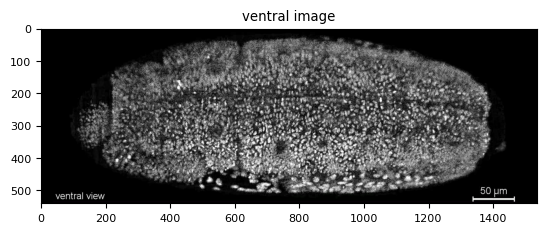

In [35]:
plt.imshow(ventral)
plt.title('ventral image')

In [36]:
from skimage import exposure
from functools import partial
#Now analyzing embryogenesis (ventral) through histogram

def plot_ventral_and_hist(ventral, axes=None, bins=64, title=None):
    """Plot an image along with its histogram and cumulative histogram.

    """
    if axes is None:
        fig, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1.5, 1]})
        fig.set_size_inches((8, 4))
        # fig.tight_layout()
    ax_ventral, ax_hist = axes
    # ax_cdf = ax_hist.twinx()

    # Display image
    ax_ventral.imshow(ventral, cmap=plt.cm.gray)
    ax_ventral.set_axis_off()
    
    if title is not None:
        ax_ventral.set_title(title)

    # Display histograms per channel
    red = ventral[:, :, 0]
    green = ventral[:, :, 1]
    blue = ventral[:, :, 2]
    
    plot_hist = partial(ax_hist.hist, bins=bins, histtype='bar', linewidth=2, alpha=0.3, density=True)
    plot_hist(red.ravel(), color='red')
    plot_hist(green.ravel(), color='green')
    plot_hist(blue.ravel(), color='blue')

    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_ylim([0, 3])
    ax_hist.set_yticks([])
    
    ax_hist.set_title('Histogram')

    # Display cumulative distribution
    # img_cdf, bins = exposure.cumulative_distribution(image, bins)
    # ax_cdf.plot(bins, img_cdf, 'r')
    # ax_cdf.set_yticks([])

    return ax_ventral, ax_hist # , ax_cdf


(<AxesSubplot:title={'center':'Original image'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

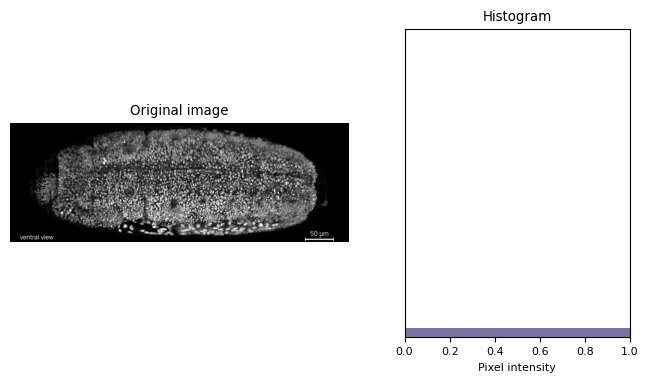

In [37]:
plot_ventral_and_hist(ventral, title='Original image')

(<AxesSubplot:title={'center':'Adaptive histogram equalization'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

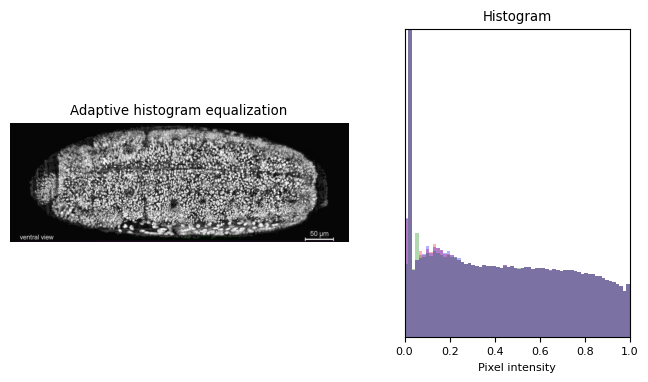

In [38]:
ventral_adapteq = exposure.equalize_adapthist(ventral, clip_limit=0.03)
plot_ventral_and_hist(ventral_adapteq, title='Adaptive histogram equalization')

(<AxesSubplot:title={'center':'Gamma adjustment, $\\gamma=0.5$'}>,
 <AxesSubplot:title={'center':'Histogram'}, xlabel='Pixel intensity'>)

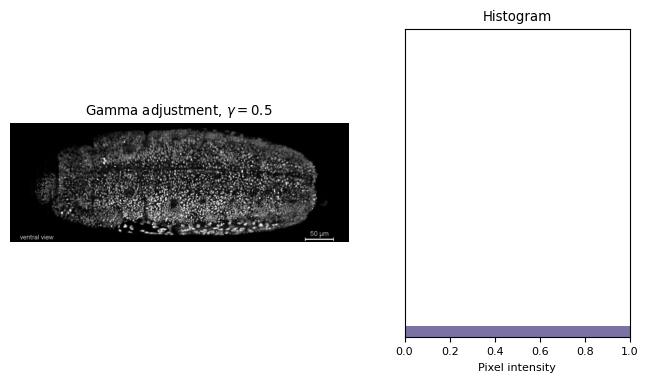

In [39]:
gamma_corrected_05 = exposure.adjust_gamma(ventral, 1.5)
plot_ventral_and_hist(gamma_corrected_05, title='Gamma adjustment, $\gamma=0.5$')

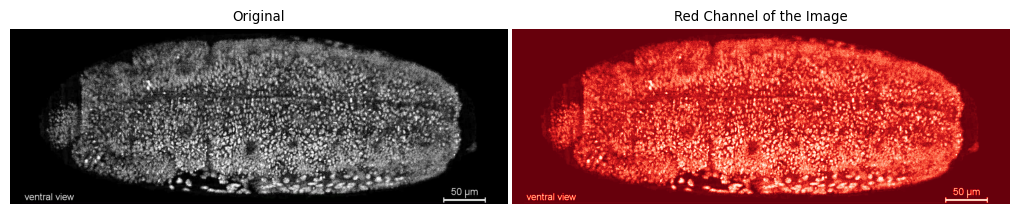

In [40]:
red = ventral[:, :, 0]

compare(ventral, red, "Red Channel of the Image", cmap_type="Reds_r")

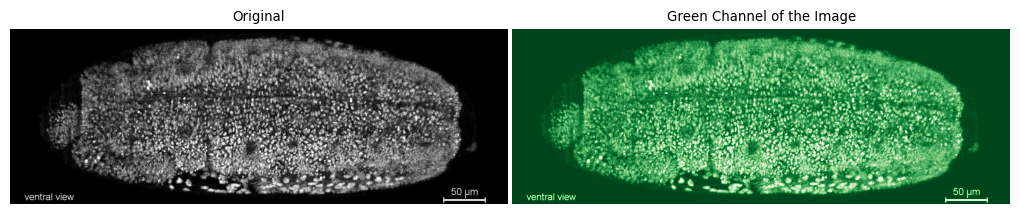

In [41]:
green = ventral[:, :, 1]

compare(ventral, green, "Green Channel of the Image", "Greens_r")

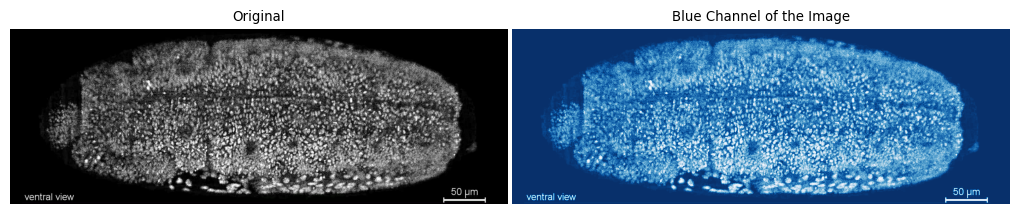

In [42]:
blue = ventral[:, :, 2]

compare(ventral, blue, "Blue Channel of the Image", "Blues_r")

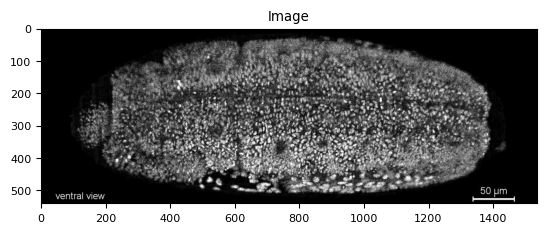

In [43]:
show(ventral, axis=True)

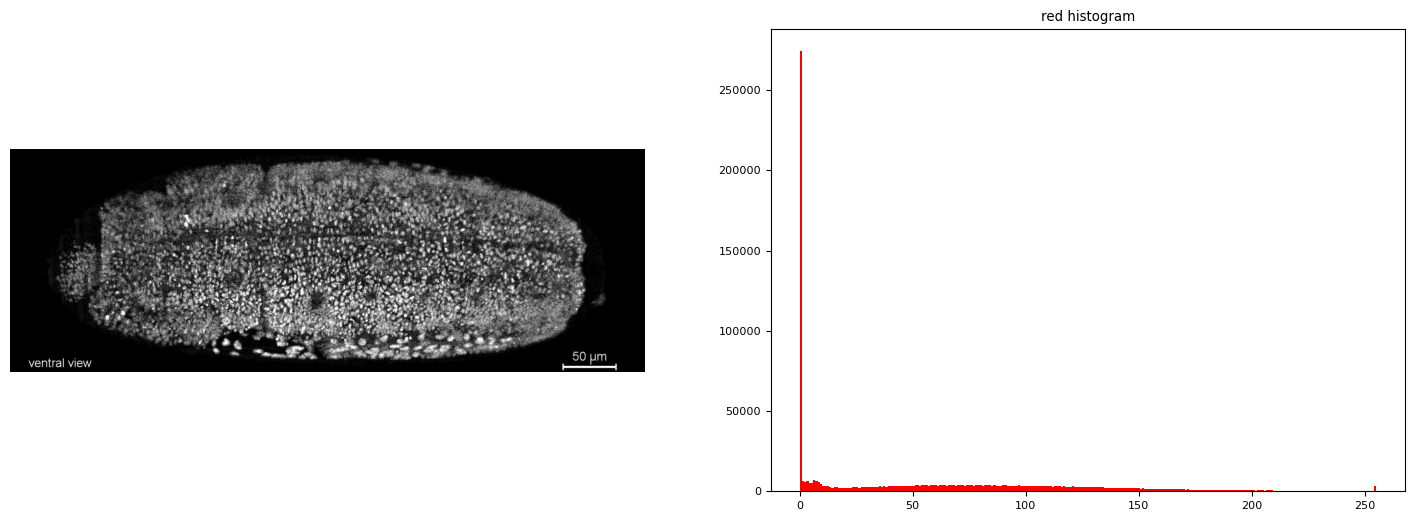

In [44]:
colorful_ventral = imread("C:/Users/dell/Desktop/contri1/image processing contri 2/ventral.tiff")

plot_with_hist_channel(colorful_ventral, "red")

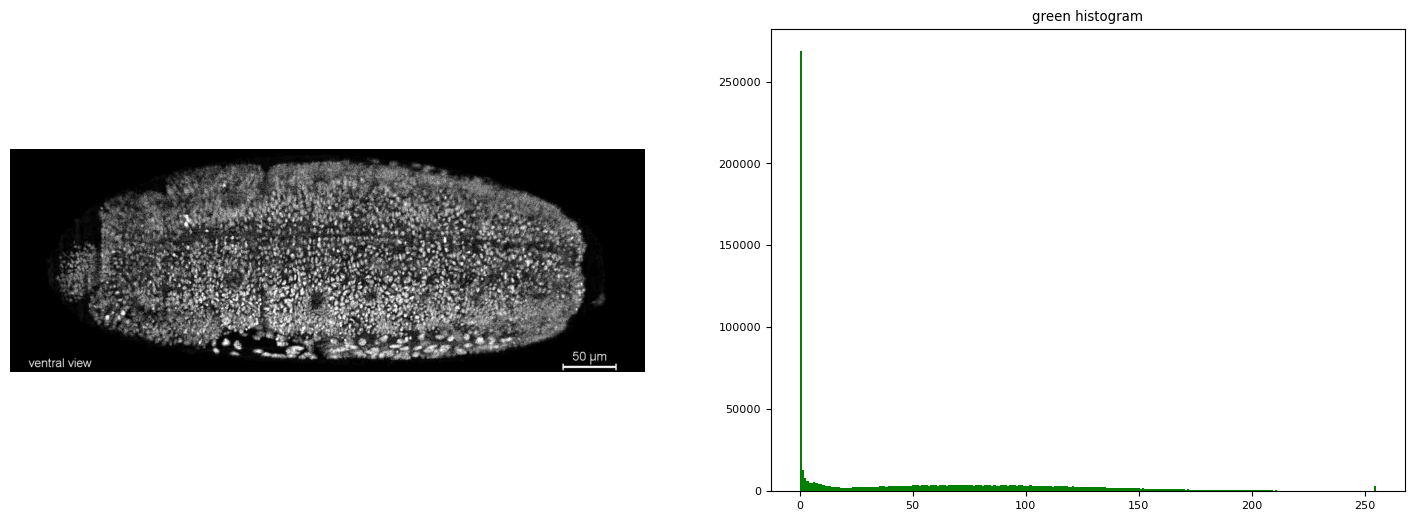

In [45]:
plot_with_hist_channel(colorful_ventral, "green")

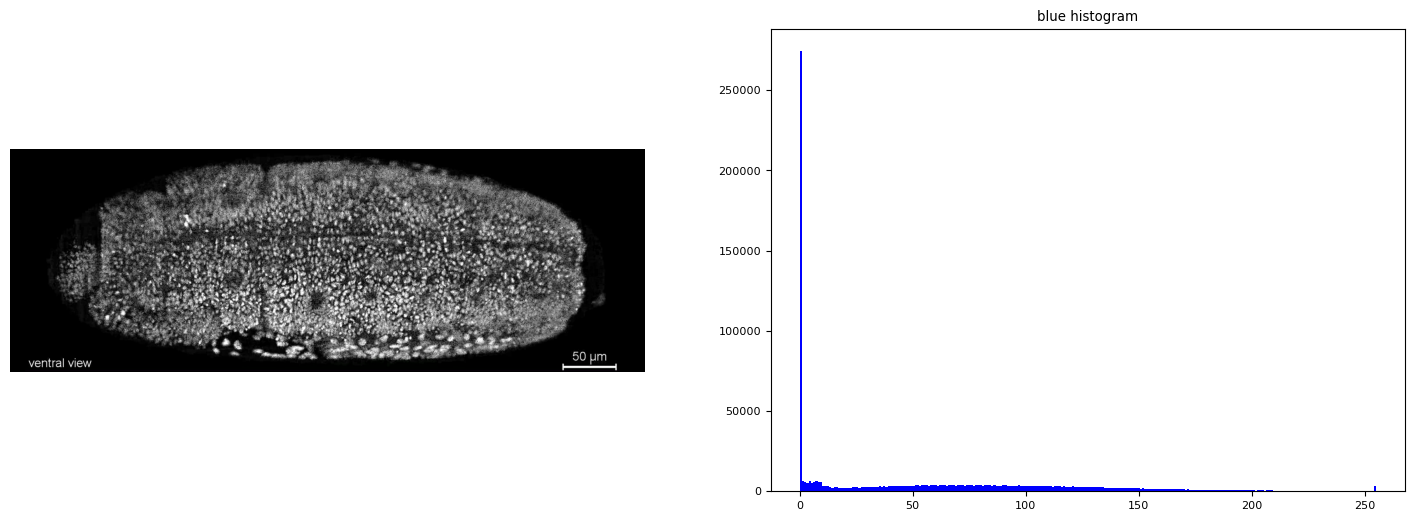

In [46]:
plot_with_hist_channel(colorful_ventral, "blue")

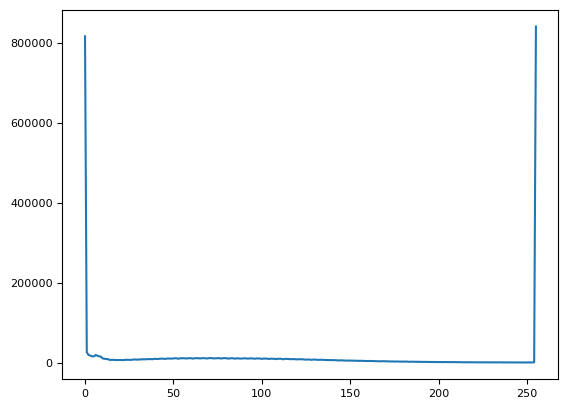

In [47]:
from skimage import io, exposure
import matplotlib.pyplot as plt

# Load the image
img = io.imread('C:/Users/dell/Desktop/contri1/image processing contri 2/ventral.tiff')

# Calculate the histogram of pixel intensities
hist, bins = exposure.histogram(img)

# Plot the histogram
plt.plot(bins, hist)
plt.show()


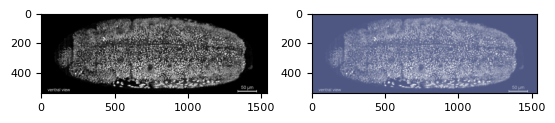

In [48]:
from skimage import io, filters
#creating the ventralimage as gaussian convolved

# Load the image
img = io.imread('C:/Users/dell/Desktop/contri1/image processing contri 2/ventral.tiff')

# Apply Gaussian convolution to the image
gaussian = filters.gaussian(img, sigma=1)

# Display the original and processed images
io.imshow_collection([img, gaussian])
io.show()

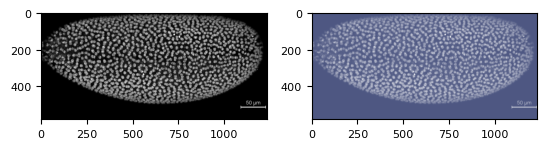

In [49]:
from skimage import io, filters
#creating the early stage drosophila image as gaussian convolved
# Load the image
img = io.imread('C:/Users/dell/Downloads/Screenshot (24).tiff')

# Apply Gaussian convolution to the image
gaussian = filters.gaussian(img, sigma=1)

# Display the original and processed images
io.imshow_collection([img, gaussian])
io.show()

In [50]:
import numpy as np
from skimage import filters, morphology
#trying to calculate the grwoth velocity in dorsal and ventral drosophila

def calculate_growth_velocity(dorsal, ventral, threshold=0.5, smoothing=True):
    """
    Calculates the growth velocity between two images.

    Parameters:
    -----------
    image1: numpy.ndarray
        The first image.
    image2: numpy.ndarray
        The second image.
    threshold: float
        The threshold value used to convert the images to binary masks.
    smoothing: bool
        Whether or not to apply smoothing to the binary masks.

    Returns:
    --------
    numpy.ndarray
        The growth velocity image.
    """
    # Convert the images to binary masks
    mask1 = dorsal > threshold
    mask2 = ventral > threshold
    
    # Apply smoothing to the masks if desired
    if smoothing:
        mask1 = morphology.binary_opening(mask1)
        mask2 = morphology.binary_opening(mask2)

    # Calculate the growth velocity as the absolute difference
    # between the masks divided by the time elapsed
    growth_velocity = np.abs(mask2 - mask1)
    
    return growth_velocity



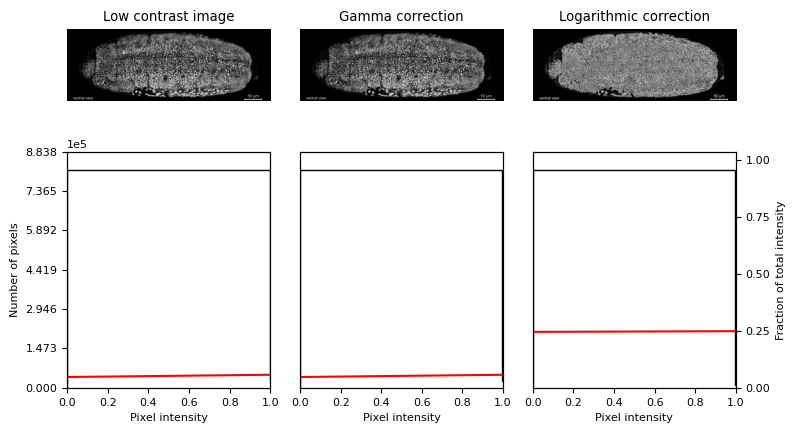

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8
##Now analyzing embryogenesis (ventral) through histogram intensities in low contrast and gamma and logarithmic correction

def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = io.imread('C:/Users/dell/Desktop/contri1/image processing contri 2/ventral.tiff')
# Gamma
gamma_corrected = exposure.adjust_gamma(img, 1)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 2)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 7))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

#we can see that the intensity is more in logarithmic correction as compared to gamma and low contrast image

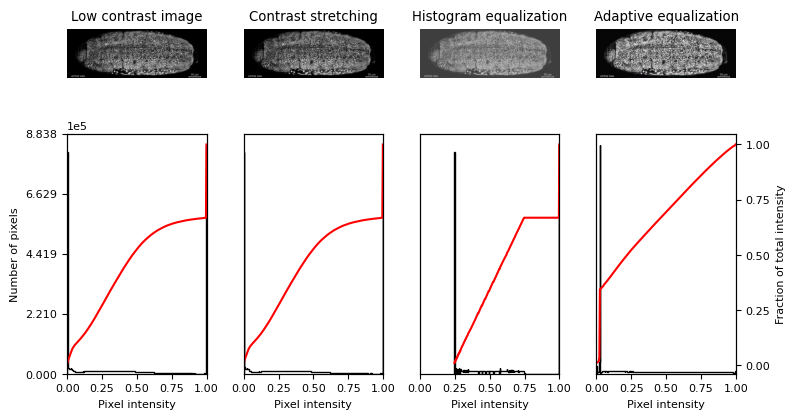

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
##Now analyzing embryogenesis (ventral) through histogram in contrast stretching ,histogram equalization,adaptive equalization
from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = io.imread('C:/Users/dell/Desktop/contri1/image processing contri 2/ventral.tiff')

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

#in the above situation we can see that for low contrast and contrast stretching the graph is almost the same but in case of histogram equalization, the graph is linarly increasing at one point after that it gets constant also in adaptive equalization it can be seen that the at first only no of pixel is increasing after a certian no of pixels is reached then only pixel intensity increases

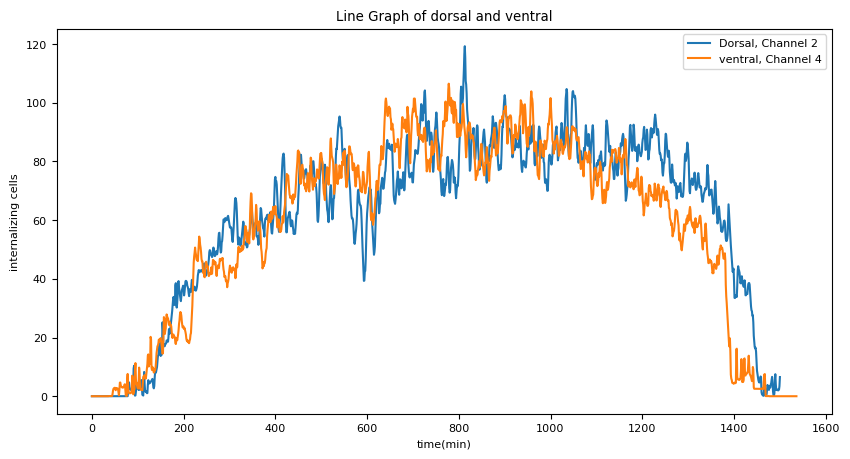

In [105]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# Load the images for dorsal and ventral

image1 = io.imread('C:/Users/dell/Desktop/contri1/image processing contri 2/dorsal.tiff')
image2 = io.imread('C:/Users/dell/Desktop/contri1/image processing contri 2/ventral.tiff')

# Get the pixel values for channels 1 and 2 of image 1
ch1_im1 = image1[:, :, 0]

# Get the pixel values for channels 1 and 2 of image 2
ch1_im2 = image2[:, :, 0]


# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot a line graph of channel 1 against channel 2 for image 1

ax.plot(ch1_im1.mean(axis=0), label='Dorsal, Channel 2')

# Plot a line graph of channel 1 against channel 2 for image 2

ax.plot(ch1_im2.mean(axis=0), label='ventral, Channel 4')

# Set the x and y axis labels
ax.set_xlabel('time(min)')
ax.set_ylabel('internalizing cells')

# Add a title to the plot
ax.set_title('Line Graph of dorsal and ventral')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


#as seen here the dorsal is comparatively higher than the ventral one during embryogenesis

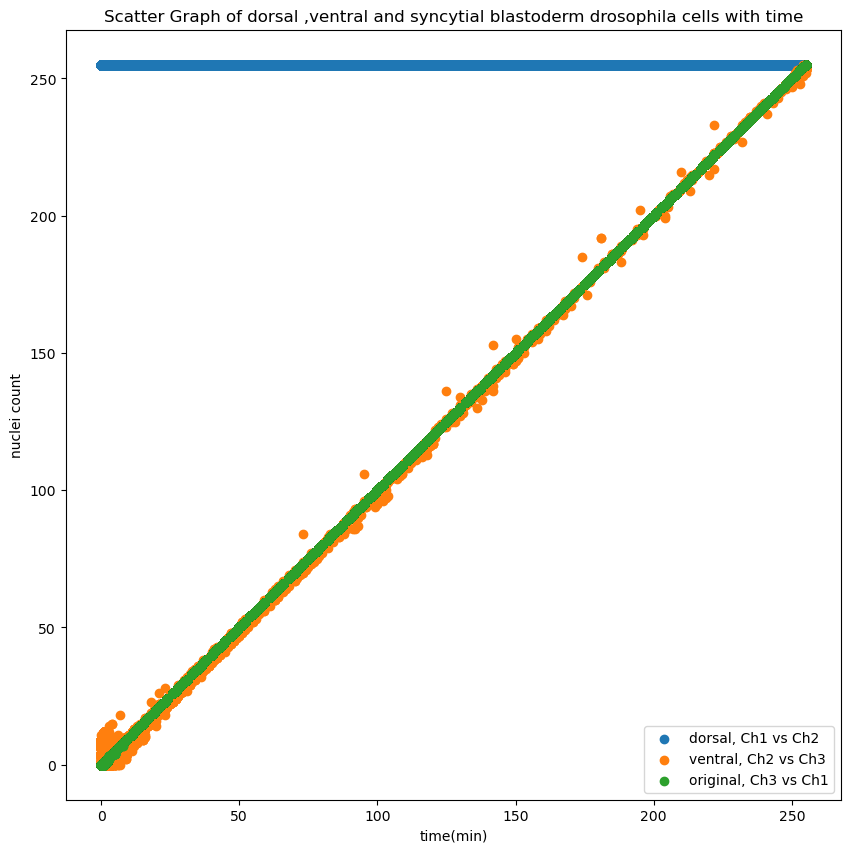

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

# Load the images into arrays --> ventral,dorsal,early stage drosophila
image1 = io.imread('C:/Users/dell/Desktop/contri1/image processing contri 2/dorsal.tiff')
image2 = io.imread('C:/Users/dell/Desktop/contri1/image processing contri 2/ventral.tiff')
image3 = io.imread("C:/Users/dell/Downloads/Screenshot (24).tiff")
# Get the pixel values for channels 1, 2, and 3 of image 1
ch1_im1 = image1[:, :, 0]
ch2_im1 = image1[:, :, 1]
#ch3_im1 = image1[:, :, 2]

# Get the pixel values for channels 1, 2, and 3 of image 2
ch1_im2 = image2[:, :, 0]
ch2_im2 = image2[:, :, 1]
ch3_im2 = image2[:, :, 2]

# Get the pixel values for channels 1, 2, and 3 of image 3
ch1_im3 = image3[:, :, 0]
ch2_im3 = image3[:, :, 1]
ch3_im3 = image3[:, :, 2]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a scatter graph of channel 1 against channel 2 for image 1
ax.scatter(ch1_im1.ravel(), ch2_im1.ravel(), label='dorsal, Ch1 vs Ch2')

# Plot a scatter graph of channel 2 against channel 3 for image 2
ax.scatter(ch2_im2.ravel(), ch3_im2.ravel(), label='ventral, Ch2 vs Ch3')

# Plot a scatter graph of channel 3 against channel 1 for image 3
ax.scatter(ch3_im3.ravel(), ch1_im3.ravel(), label='original, Ch3 vs Ch1')

# Set the x and y axis labels
ax.set_xlabel('time(min)')
ax.set_ylabel('nuclei count')

# Add a title to the plot
ax.set_title('Scatter Graph of dorsal ,ventral and syncytial blastoderm drosophila cells with time')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()


#this scatter plot shows the relation between the embryogenesis (both dorsal and ventral) and syncytial blastoderm of drosophila
#we can see that embryodenesis (both dorsal and ventral)cells  increases with time linearly whereasin case of syncytial blastoderm the cells remains constant throughout the period of time 